In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline

In [2]:
engine = create_engine("sqlite:///mta_data.db") # 'C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'TIME', 'ENTRIES', 'EXITS' 
mta_data = pd.read_sql("SELECT [C/A], UNIT, SCP, STATION, DATE, TIME, ENTRIES, EXITS FROM mta_data m WHERE m.DESC = 'REGULAR' AND DATE NOT IN ('03/30/2019', '03/31/2019') ORDER BY [C/A], UNIT, STATION, SCP;", engine)
mta_data.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,10/19/2019,00:00:00,7238905,2452500
1,A002,R051,02-00-00,59 ST,10/19/2019,04:00:00,7238924,2452505
2,A002,R051,02-00-00,59 ST,10/19/2019,08:00:00,7238945,2452536
3,A002,R051,02-00-00,59 ST,10/19/2019,12:00:00,7239029,2452602
4,A002,R051,02-00-00,59 ST,10/19/2019,16:00:00,7239280,2452651


In [3]:
mta_data.describe()

,ENTRIES,EXITS
count,6.092096e+06,6.092096e+06
mean,4.184416e+07,3.439706e+07
std,2.138072e+08,1.971870e+08
min,0.000000e+00,0.000000e+00
25%,3.061350e+05,1.287550e+05
50%,2.110190e+06,1.210285e+06
75%,6.697763e+06,4.582873e+06
max,2.129393e+09,2.124193e+09


In [4]:
mta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092096 entries, 0 to 6092095
Data columns (total 8 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   C/A      object
 1   UNIT     object
 2   SCP      object
 3   STATION  object
 4   DATE     object
 5   TIME     object
 6   ENTRIES  int64 
 7   EXITS    int64 
dtypes: int64(2), object(6)
memory usage: 371.8+ MB


In [5]:
mta_data.shape

(6092096, 8)

In [6]:
mta_data.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'TIME', 'ENTRIES', 'EXITS'], dtype='object')

In [7]:
# strip columns of extra whitespace just in case
mta_data.columns = mta_data.columns.str.strip()
# create datetime
mta_data['DATE_TIME'] = pd.to_datetime(mta_data.DATE + ' ' + mta_data.TIME, 
                                       format = '%m/%d/%Y %H:%M:%S')
mta_data.drop(['DATE', 'TIME'], axis = 1, inplace = True)
mta_data

,C/A,UNIT,SCP,STATION,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,7238905,2452500,2019-10-19 00:00:00
1,A002,R051,02-00-00,59 ST,7238924,2452505,2019-10-19 04:00:00
2,A002,R051,02-00-00,59 ST,7238945,2452536,2019-10-19 08:00:00
3,A002,R051,02-00-00,59 ST,7239029,2452602,2019-10-19 12:00:00
4,A002,R051,02-00-00,59 ST,7239280,2452651,2019-10-19 16:00:00
...,...,...,...,...,...,...,...
6092091,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,374,2019-04-05 05:00:00
6092092,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,374,2019-04-05 09:00:00
6092093,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,374,2019-04-05 13:00:00
6092094,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,374,2019-04-05 17:00:00


In [8]:
# check for null data
mta_data.isnull().sum()

C/A          0
UNIT         0
SCP          0
STATION      0
ENTRIES      0
EXITS        0
DATE_TIME    0
dtype: int64

In [9]:
# drop duplicate rows, if there are any
mta_data.shape

(6092096, 7)

In [10]:
# one way to drop duplicates, however the SQL call took care of them so should be nothing here
mta_data = mta_data.drop_duplicates()
mta_data.shape

(6092096, 7)

In [11]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(mta_data
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-04-01 00:00:00,1
4061395,R139,R031,04-00-02,34 ST-PENN STA,2019-07-09 08:00:00,1
4061404,R139,R031,04-00-02,34 ST-PENN STA,2019-07-10 20:00:00,1
4061403,R139,R031,04-00-02,34 ST-PENN STA,2019-07-10 16:00:00,1
4061402,R139,R031,04-00-02,34 ST-PENN STA,2019-07-10 12:00:00,1


In [12]:
# now sort per turnstile, by day 
# resetting index in order to peruse data by rows below
mta_data = mta_data.sort_values(by=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
mta_data

,C/A,UNIT,SCP,STATION,ENTRIES,EXITS,DATE_TIME
1219,A002,R051,02-00-00,59 ST,7000528,2374095,2019-04-01 00:00:00
1220,A002,R051,02-00-00,59 ST,7000539,2374095,2019-04-01 04:00:00
1221,A002,R051,02-00-00,59 ST,7000583,2374207,2019-04-01 08:00:00
1222,A002,R051,02-00-00,59 ST,7000744,2374438,2019-04-01 12:00:00
1223,A002,R051,02-00-00,59 ST,7001078,2374491,2019-04-01 16:00:00
...,...,...,...,...,...,...,...
6090892,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,420,2019-10-25 05:00:00
6090893,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,420,2019-10-25 09:00:00
6090894,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,420,2019-10-25 13:00:00
6090895,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,420,2019-10-25 17:00:00


In [13]:
# the data is sorted by turnstile, from earliest to latest datetime
mta_data.iloc[1240:1260]

,C/A,UNIT,SCP,STATION,ENTRIES,EXITS,DATE_TIME
33,A002,R051,02-00-00,59 ST,7244559,2454822,2019-10-24 12:00:00
34,A002,R051,02-00-00,59 ST,7244915,2454887,2019-10-24 16:00:00
35,A002,R051,02-00-00,59 ST,7245696,2454964,2019-10-24 20:00:00
36,A002,R051,02-00-00,59 ST,7245823,2454982,2019-10-25 00:00:00
37,A002,R051,02-00-00,59 ST,7245824,2454982,2019-10-25 04:00:00
38,A002,R051,02-00-00,59 ST,7245867,2455088,2019-10-25 08:00:00
39,A002,R051,02-00-00,59 ST,7246054,2455324,2019-10-25 12:00:00
40,A002,R051,02-00-00,59 ST,7246400,2455401,2019-10-25 16:00:00
41,A002,R051,02-00-00,59 ST,7247144,2455465,2019-10-25 20:00:00
2468,A002,R051,02-00-01,59 ST,6239983,1399465,2019-04-01 00:00:00


In [14]:
# clearly this turnstile has issues
mta_data[mta_data['STATION'] == 'RIT-ROOSEVELT'].tail(40)

,C/A,UNIT,SCP,STATION,ENTRIES,EXITS,DATE_TIME
6090857,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,420,2019-10-19 09:00:00
6090858,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,420,2019-10-19 13:00:00
6090859,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,420,2019-10-19 17:00:00
6090860,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,420,2019-10-19 21:00:00
6090861,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,420,2019-10-20 01:00:00
6090862,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,420,2019-10-20 05:00:00
6090863,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,420,2019-10-20 09:00:00
6090864,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,420,2019-10-20 13:00:00
6090865,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,420,2019-10-20 17:00:00
6090866,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,420,2019-10-20 21:00:00


In [15]:
# add new column to represent entries/exits between current time and time 8 hours ago, or two rows previous.

mta_data = mta_data.join(mta_data
                         .groupby(["C/A", "UNIT", "SCP", "STATION"], as_index=False)
                         [['ENTRIES', 'EXITS']].diff(2), rsuffix = '_8HR')

mta_data

,C/A,UNIT,SCP,STATION,ENTRIES,EXITS,DATE_TIME,ENTRIES_8HR,EXITS_8HR
1219,A002,R051,02-00-00,59 ST,7000528,2374095,2019-04-01 00:00:00,NaN,NaN
1220,A002,R051,02-00-00,59 ST,7000539,2374095,2019-04-01 04:00:00,NaN,NaN
1221,A002,R051,02-00-00,59 ST,7000583,2374207,2019-04-01 08:00:00,55.0,112.0
1222,A002,R051,02-00-00,59 ST,7000744,2374438,2019-04-01 12:00:00,205.0,343.0
1223,A002,R051,02-00-00,59 ST,7001078,2374491,2019-04-01 16:00:00,495.0,284.0
...,...,...,...,...,...,...,...,...,...
6090892,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,420,2019-10-25 05:00:00,0.0,0.0
6090893,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,420,2019-10-25 09:00:00,0.0,0.0
6090894,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,420,2019-10-25 13:00:00,0.0,0.0
6090895,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,420,2019-10-25 17:00:00,0.0,0.0


In [16]:
mta_data[mta_data["ENTRIES_8HR"] < 0]["ENTRIES_8HR"].describe()

count    5.706200e+04
mean    -1.289011e+06
std      4.190888e+07
min     -2.129137e+09
25%     -8.720000e+02
50%     -4.310000e+02
75%     -1.480000e+02
max     -1.000000e+00
Name: ENTRIES_8HR, dtype: float64

In [17]:
# the min and max are way out there
mta_data["ENTRIES_8HR"].describe()

count    6.082143e+06
mean    -5.337008e+02
std      5.630876e+06
min     -2.129137e+09
25%      3.600000e+01
50%      1.780000e+02
75%      4.750000e+02
max      2.055526e+09
Name: ENTRIES_8HR, dtype: float64

In [18]:
mta_data["EXITS_8HR"].describe()

count    6.082143e+06
mean     9.834646e+02
std      4.311056e+06
min     -1.921803e+09
25%      2.800000e+01
50%      1.250000e+02
75%      3.420000e+02
max      1.971923e+09
Name: EXITS_8HR, dtype: float64

In [19]:
# double checking switching from one turnstile to the next where large negatives used to be
mta_data[1240:1260]

,C/A,UNIT,SCP,STATION,ENTRIES,EXITS,DATE_TIME,ENTRIES_8HR,EXITS_8HR
33,A002,R051,02-00-00,59 ST,7244559,2454822,2019-10-24 12:00:00,203.0,370.0
34,A002,R051,02-00-00,59 ST,7244915,2454887,2019-10-24 16:00:00,511.0,344.0
35,A002,R051,02-00-00,59 ST,7245696,2454964,2019-10-24 20:00:00,1137.0,142.0
36,A002,R051,02-00-00,59 ST,7245823,2454982,2019-10-25 00:00:00,908.0,95.0
37,A002,R051,02-00-00,59 ST,7245824,2454982,2019-10-25 04:00:00,128.0,18.0
38,A002,R051,02-00-00,59 ST,7245867,2455088,2019-10-25 08:00:00,44.0,106.0
39,A002,R051,02-00-00,59 ST,7246054,2455324,2019-10-25 12:00:00,230.0,342.0
40,A002,R051,02-00-00,59 ST,7246400,2455401,2019-10-25 16:00:00,533.0,313.0
41,A002,R051,02-00-00,59 ST,7247144,2455465,2019-10-25 20:00:00,1090.0,141.0
2468,A002,R051,02-00-01,59 ST,6239983,1399465,2019-04-01 00:00:00,NaN,NaN


In [20]:
# now check for outrageous negative values again
mta_data[mta_data['ENTRIES_8HR'] < -20000].describe()

,ENTRIES,EXITS,ENTRIES_8HR,EXITS_8HR
count,1.514000e+03,1.514000e+03,1.514000e+03,1.514000e+03
mean,6.335116e+06,5.698623e+06,-4.855911e+07,-2.935104e+07
std,8.370584e+07,8.969071e+07,2.528674e+08,1.835020e+08
min,0.000000e+00,0.000000e+00,-2.129137e+09,-1.921803e+09
25%,3.200000e+01,1.500000e+01,-1.784261e+06,-1.252394e+06
50%,1.695000e+02,8.800000e+01,-2.531190e+05,-1.678520e+05
75%,6.652500e+02,3.930000e+02,-8.034500e+04,-3.557700e+04
max,1.825155e+09,1.931614e+09,-2.002900e+04,1.484321e+09


In [21]:
mta_data[mta_data['EXITS_8HR'] < -20000].describe()

,ENTRIES,EXITS,ENTRIES_8HR,EXITS_8HR
count,1.449000e+03,1.449000e+03,1.449000e+03,1.449000e+03
mean,5.751487e+06,2.577888e+06,-4.833250e+07,-3.374262e+07
std,6.482905e+07,3.852290e+07,2.623953e+08,1.805090e+08
min,0.000000e+00,0.000000e+00,-2.129137e+09,-1.921803e+09
25%,2.200000e+01,2.600000e+01,-1.852960e+06,-1.662630e+06
50%,1.440000e+02,1.250000e+02,-2.382290e+05,-2.655730e+05
75%,6.300000e+02,4.770000e+02,-5.456200e+04,-6.595800e+04
max,1.178879e+09,9.965000e+08,1.174407e+09,-2.031700e+04


In [22]:
# check out the max ENTRIES_8HR value and the rows nearby (next cell)
mta_data[mta_data['ENTRIES_8HR'] == -20029]

,C/A,UNIT,SCP,STATION,ENTRIES,EXITS,DATE_TIME,ENTRIES_8HR,EXITS_8HR
3521483,PTH06,R546,00-00-05,PAVONIA/NEWPORT,286,3742,2019-10-17 10:12:17,-20029.0,-419196.0


In [23]:
# so sometimes the turnstiles stop working and either skip days or stop counting
# at which point they do a hard reset, changing the counters as well
# looking at one of the cases below, and going by max num people/8 hrs = 20000
# filtering by abs_value & 20000 won't take care of outliers in relation to turnstiles
# the 19904 below may work at Grand Central Station, but not here
mta_data[3522520:3522540]

,C/A,UNIT,SCP,STATION,ENTRIES,EXITS,DATE_TIME,ENTRIES_8HR,EXITS_8HR
3521518,PTH06,R546,00-00-05,PAVONIA/NEWPORT,20315,420586,2019-10-09 14:48:50,36.0,2204.0
3521519,PTH06,R546,00-00-05,PAVONIA/NEWPORT,20315,422130,2019-10-09 19:00:50,0.0,1974.0
3521520,PTH06,R546,00-00-05,PAVONIA/NEWPORT,20315,422876,2019-10-09 23:12:50,0.0,2290.0
3521521,PTH06,R546,00-00-05,PAVONIA/NEWPORT,20315,422938,2019-10-10 03:24:50,0.0,808.0
3521522,PTH06,R546,00-00-05,PAVONIA/NEWPORT,20315,423126,2019-10-10 07:36:50,0.0,250.0
3521483,PTH06,R546,00-00-05,PAVONIA/NEWPORT,286,3742,2019-10-17 10:12:17,-20029.0,-419196.0
3521484,PTH06,R546,00-00-05,PAVONIA/NEWPORT,411,4180,2019-10-17 14:24:15,-19904.0,-418946.0
3521485,PTH06,R546,00-00-05,PAVONIA/NEWPORT,822,5355,2019-10-17 18:36:15,536.0,1613.0
3521486,PTH06,R546,00-00-05,PAVONIA/NEWPORT,881,6278,2019-10-17 22:48:15,470.0,2098.0
3521487,PTH06,R546,00-00-05,PAVONIA/NEWPORT,885,6408,2019-10-18 03:00:15,63.0,1053.0


In [24]:
mta_data['ENTRIES_8HR'] = mta_data['ENTRIES_8HR'].apply(lambda x: -x if x < 0 else x)
mta_data['EXITS_8HR'] = mta_data['EXITS_8HR'].apply(lambda x: -x if x < 0 else x)

mta_data[3522520:3522540]

,C/A,UNIT,SCP,STATION,ENTRIES,EXITS,DATE_TIME,ENTRIES_8HR,EXITS_8HR
3521518,PTH06,R546,00-00-05,PAVONIA/NEWPORT,20315,420586,2019-10-09 14:48:50,36.0,2204.0
3521519,PTH06,R546,00-00-05,PAVONIA/NEWPORT,20315,422130,2019-10-09 19:00:50,0.0,1974.0
3521520,PTH06,R546,00-00-05,PAVONIA/NEWPORT,20315,422876,2019-10-09 23:12:50,0.0,2290.0
3521521,PTH06,R546,00-00-05,PAVONIA/NEWPORT,20315,422938,2019-10-10 03:24:50,0.0,808.0
3521522,PTH06,R546,00-00-05,PAVONIA/NEWPORT,20315,423126,2019-10-10 07:36:50,0.0,250.0
3521483,PTH06,R546,00-00-05,PAVONIA/NEWPORT,286,3742,2019-10-17 10:12:17,20029.0,419196.0
3521484,PTH06,R546,00-00-05,PAVONIA/NEWPORT,411,4180,2019-10-17 14:24:15,19904.0,418946.0
3521485,PTH06,R546,00-00-05,PAVONIA/NEWPORT,822,5355,2019-10-17 18:36:15,536.0,1613.0
3521486,PTH06,R546,00-00-05,PAVONIA/NEWPORT,881,6278,2019-10-17 22:48:15,470.0,2098.0
3521487,PTH06,R546,00-00-05,PAVONIA/NEWPORT,885,6408,2019-10-18 03:00:15,63.0,1053.0


In [25]:
mta_data[mta_data['ENTRIES_8HR']<0]

,C/A,UNIT,SCP,STATION,ENTRIES,EXITS,DATE_TIME,ENTRIES_8HR,EXITS_8HR


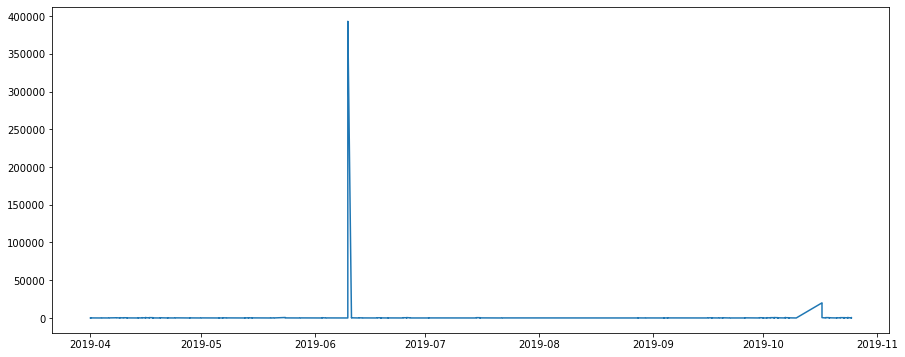

In [26]:
plt.figure(figsize = [15,6])
plt.plot(mta_data[(mta_data['C/A'] == 'PTH06') &
            (mta_data['UNIT'] == 'R546') &
            (mta_data['STATION'] == 'PAVONIA/NEWPORT') &
            (mta_data['SCP'] == '00-00-05')]['DATE_TIME'].dt.date,
         mta_data[(mta_data['C/A'] == 'PTH06') &
            (mta_data['UNIT'] == 'R546') &
            (mta_data['STATION'] == 'PAVONIA/NEWPORT') &
            (mta_data['SCP'] == '00-00-05')]['ENTRIES_8HR']);

In [27]:
# this is not my code design, found it on stackoverflow
# I could change some things to make it more mine.

# using std * 2.7, because 3 was still letting some crazy numbers get through
entry_grp = mta_data.groupby(['C/A', 'UNIT', 'SCP', 'STATION'])['ENTRIES_8HR']
entry_grp_mean = entry_grp.transform('mean')
entry_grp_std = entry_grp.transform('std')
mta_out = mta_data[mta_data['ENTRIES_8HR']
                    .between(entry_grp_mean.sub(entry_grp_std.mul(2.7)),
                             entry_grp_mean.add(entry_grp_std.mul(2.7)),
                             inclusive = False)]

In [28]:
# do it for exits, too, although entries probably took care of most.
exit_grp = mta_out.groupby(['C/A', 'UNIT', 'SCP', 'STATION'])['EXITS_8HR']
exit_grp_mean = exit_grp.transform('mean')
exit_grp_std = exit_grp.transform('std')
mta_out = mta_out[mta_out['EXITS_8HR']
                    .between(exit_grp_mean.sub(exit_grp_std.mul(2.7)),
                             exit_grp_mean.add(exit_grp_std.mul(2.7)),
                             inclusive = False)]

In [29]:
# this shows the outlier is removed from the example above
# 3521483 and 3521484 are no longer in the dataset
mta_out[(mta_out['C/A'] == 'PTH06') &
         (mta_out['UNIT'] == 'R546') &
         (mta_out['STATION'] == 'PAVONIA/NEWPORT') &
         (mta_out['SCP'] == '00-00-05') &
         (mta_out.DATE_TIME.dt.date > dt.date(2019, 10, 9))].head()

,C/A,UNIT,SCP,STATION,ENTRIES,EXITS,DATE_TIME,ENTRIES_8HR,EXITS_8HR
3521521,PTH06,R546,00-00-05,PAVONIA/NEWPORT,20315,422938,2019-10-10 03:24:50,0.0,808.0
3521522,PTH06,R546,00-00-05,PAVONIA/NEWPORT,20315,423126,2019-10-10 07:36:50,0.0,250.0
3521485,PTH06,R546,00-00-05,PAVONIA/NEWPORT,822,5355,2019-10-17 18:36:15,536.0,1613.0
3521486,PTH06,R546,00-00-05,PAVONIA/NEWPORT,881,6278,2019-10-17 22:48:15,470.0,2098.0
3521487,PTH06,R546,00-00-05,PAVONIA/NEWPORT,885,6408,2019-10-18 03:00:15,63.0,1053.0


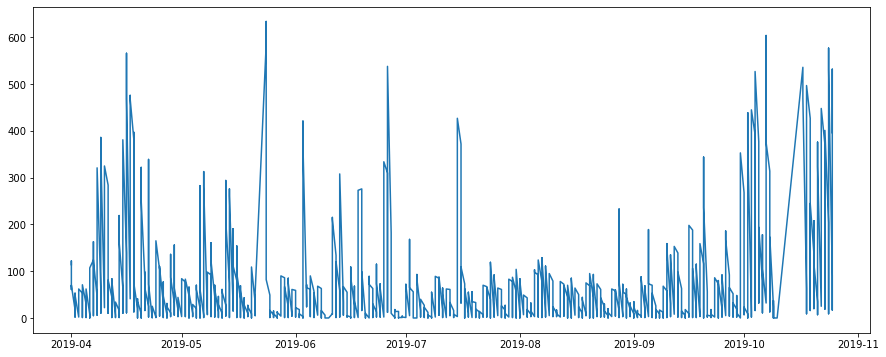

In [30]:
# There's still this crazy value that wouldn't go away even w/ std=1.5 above
# filter values outside of some constant * mean if there's time
mta_out[(mta_out['C/A'] == 'PTH06') &
                  (mta_out['UNIT'] == 'R546') &
                  (mta_out['STATION'] == 'PAVONIA/NEWPORT') &
                  (mta_out['SCP'] == '00-00-05') &
        (mta_out['DATE_TIME'].dt.date == dt.date(2019, 5, 24))]

plt.figure(figsize = [15,6])
plt.plot(mta_out[(mta_out['C/A'] == 'PTH06') &
                  (mta_out['UNIT'] == 'R546') &
                  (mta_out['STATION'] == 'PAVONIA/NEWPORT') &
                  (mta_out['SCP'] == '00-00-05')]['DATE_TIME'].dt.date,
         mta_out[(mta_out['C/A'] == 'PTH06') &
                  (mta_out['UNIT'] == 'R546') &
                  (mta_out['STATION'] == 'PAVONIA/NEWPORT') &
                  (mta_out['SCP'] == '00-00-05')]['ENTRIES_8HR']);

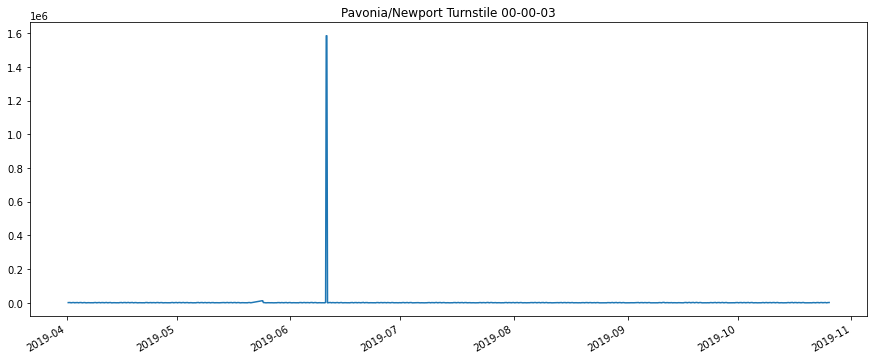

In [31]:
# pick one turnstile and plot its 8-hour ridership
turn_one = mta_data[(mta_data['C/A'] == 'PTH06') &
                    (mta_data['UNIT'] == 'R546') &
                    (mta_data['STATION'] == 'PAVONIA/NEWPORT') &
                    (mta_data['SCP'] == '00-00-03')]
fig = plt.figure(figsize = [15,6])
plt.plot(turn_one['DATE_TIME'], (turn_one['ENTRIES_8HR'] + turn_one['EXITS_8HR']))
plt.title('Pavonia/Newport Turnstile 00-00-03')
fig.autofmt_xdate();

In [32]:
turn_one.describe()

,ENTRIES,EXITS,ENTRIES_8HR,EXITS_8HR
count,1172.000000,1172.000000,1170.000000,1170.000000
mean,393759.547782,237499.110068,2396.717949,1436.392308
std,359738.937470,242586.986737,39993.442180,25434.560247
min,1047.000000,287.000000,1.000000,26.000000
25%,111390.500000,50489.250000,209.250000,211.250000
50%,216860.500000,103479.500000,670.000000,342.000000
75%,856708.750000,558363.750000,1223.000000,504.750000
max,969582.000000,616268.000000,968428.000000,615855.000000


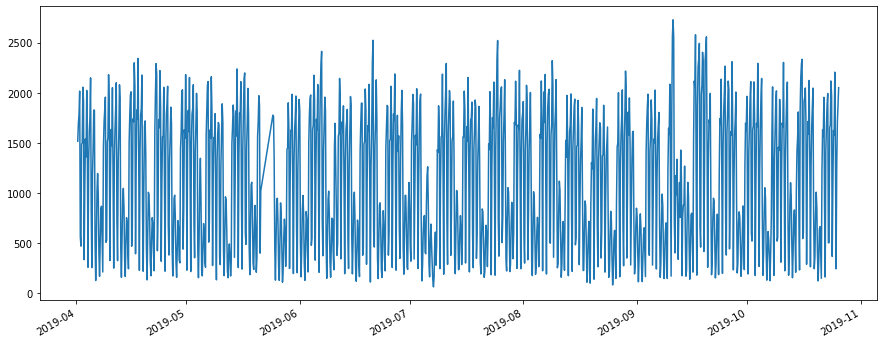

In [33]:
# now you can see that crazy spike
# let's try the data with the outliers removed...
turn_two = mta_out[(mta_out['C/A'] == 'PTH06') &
                    (mta_out['UNIT'] == 'R546') &
                    (mta_out['STATION'] == 'PAVONIA/NEWPORT') &
                    (mta_out['SCP'] == '00-00-03')]
fig = plt.figure(figsize = [15,6])
plt.plot(turn_two['DATE_TIME'], (turn_two['ENTRIES_8HR'] + turn_two['EXITS_8HR']))
fig.autofmt_xdate();

In [34]:
turn_two.describe()

,ENTRIES,EXITS,ENTRIES_8HR,EXITS_8HR
count,1165.000000,1165.000000,1165.000000,1165.00000
mean,392934.336481,236897.180258,729.696137,377.68412
std,359261.927654,242298.767008,530.043020,214.29334
min,1156.000000,557.000000,1.000000,26.00000
25%,111392.000000,50499.000000,206.000000,211.00000
50%,216751.000000,103447.000000,668.000000,341.00000
75%,856470.000000,558308.000000,1223.000000,502.00000
max,969582.000000,616268.000000,2249.000000,1037.00000


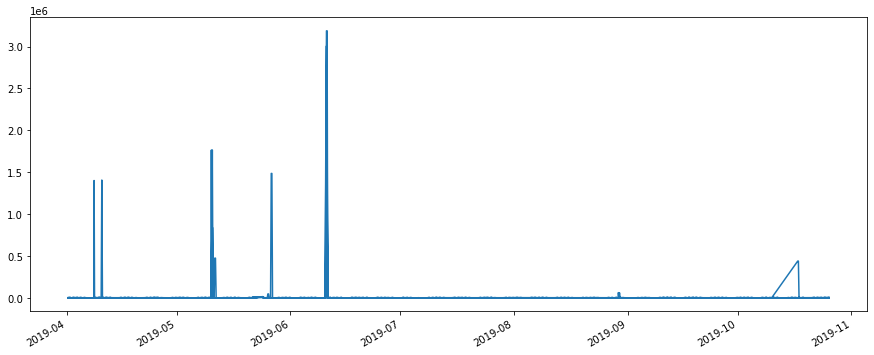

In [35]:
# now try the same for the whole station, combining turnstiles
stat_one = mta_data[(mta_data['C/A'] == 'PTH06') &
                    (mta_data['UNIT'] == 'R546') &
                    (mta_data['STATION'] == 'PAVONIA/NEWPORT')]
fig = plt.figure(figsize = [15,6])
plt.plot(stat_one['DATE_TIME'], (stat_one['ENTRIES_8HR'] + stat_one['EXITS_8HR']))
fig.autofmt_xdate();

In [36]:
stat_one.describe()

,ENTRIES,EXITS,ENTRIES_8HR,EXITS_8HR
count,1.272900e+04,1.272900e+04,1.270700e+04,1.270700e+04
mean,2.992172e+05,3.464862e+05,2.374294e+03,2.271788e+03
std,4.177803e+05,5.808141e+05,4.691610e+04,5.114047e+04
min,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00
25%,4.924400e+04,3.546400e+04,9.800000e+01,1.450000e+02
50%,1.262740e+05,1.175810e+05,3.690000e+02,3.570000e+02
75%,3.378840e+05,3.753660e+05,7.315000e+02,7.715000e+02
max,1.947791e+06,2.612408e+06,1.946678e+06,2.611206e+06


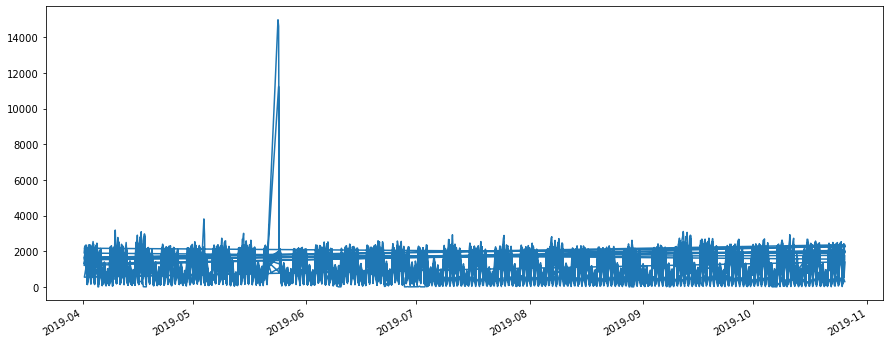

In [37]:
# and with outliers removed
stat_two = mta_out[(mta_out['C/A'] == 'PTH06') &
                    (mta_out['UNIT'] == 'R546') &
                    (mta_out['STATION'] == 'PAVONIA/NEWPORT')]
fig = plt.figure(figsize = [15,6])
plt.plot(stat_two['DATE_TIME'], (stat_two['ENTRIES_8HR'] + stat_two['EXITS_8HR']))
fig.autofmt_xdate();

In [38]:
stat_two.describe()

,ENTRIES,EXITS,ENTRIES_8HR,EXITS_8HR
count,1.262900e+04,1.262900e+04,12629.000000,12629.000000
mean,2.981844e+05,3.459939e+05,516.666244,530.849632
std,4.170669e+05,5.809225e+05,515.419064,546.071578
min,0.000000e+00,5.600000e+01,0.000000,0.000000
25%,4.953800e+04,3.570600e+04,97.000000,144.000000
50%,1.259150e+05,1.172730e+05,367.000000,354.000000
75%,3.333940e+05,3.728020e+05,725.000000,760.000000
max,1.947791e+06,2.612408e+06,8265.000000,14391.000000


In [39]:
#stat_two[(stat_two['SCP'] == '00-00-05')][280:330]
#stat_two[stat_two['EXITS_8HR'] > 8000]
#mta_data.groupby(['C/A', 'UNIT', 'SCP', 'STATION'])['ENTRIES_8HR'].transform('std')
#stat_two.groupby(stat_two['SCP'] == '00-00-05')['EXITS_8HR'].transform('std')
#stat_two.groupby(stat_two['SCP'] == '00-00-05')['EXITS_8HR'].transform('mean')

# the stations plot is drawing lines back and forth between turnstiles. 
# I need it to show the sum of the 8-hr windows over all the turnstiles of the station.
# but are they all sampled at the same time?
len(stat_two['DATE_TIME'].unique())

12629

In [40]:
stat_two.shape

(12629, 9)

In [41]:
# so the datetimes are all unique
# let's look at all the times sorted for one date
stat_two[stat_two['DATE_TIME'].dt.date == dt.date(2019, 4, 16)].sort_values(by=['DATE_TIME'])

,C/A,UNIT,SCP,STATION,ENTRIES,EXITS,DATE_TIME,ENTRIES_8HR,EXITS_8HR
3520179,PTH06,R546,00-00-03,PAVONIA/NEWPORT,852502,555991,2019-04-16 00:00:47,1088.0,922.0
3516665,PTH06,R546,00-00-00,PAVONIA/NEWPORT,1830652,482764,2019-04-16 00:13:52,1554.0,465.0
3517837,PTH06,R546,00-00-01,PAVONIA/NEWPORT,322372,63670,2019-04-16 00:26:09,1523.0,452.0
3525978,PTH06,R546,00-00-08,PAVONIA/NEWPORT,1230517,1763996,2019-04-16 00:40:02,328.0,1808.0
3524808,PTH06,R546,00-00-07,PAVONIA/NEWPORT,207018,550293,2019-04-16 00:50:27,407.0,2008.0
3522483,PTH06,R546,00-00-05,PAVONIA/NEWPORT,382052,2426607,2019-04-16 02:24:43,139.0,1534.0
3527150,PTH06,R546,00-00-09,PAVONIA/NEWPORT,722509,647884,2019-04-16 02:44:59,126.0,789.0
3521350,PTH06,R546,00-00-04,PAVONIA/NEWPORT,230752,381225,2019-04-16 02:59:51,85.0,731.0
3528326,PTH06,R546,00-00-0A,PAVONIA/NEWPORT,519300,384136,2019-04-16 03:33:59,16.0,502.0
3519008,PTH06,R546,00-00-02,PAVONIA/NEWPORT,1079628,289406,2019-04-16 03:54:00,148.0,220.0


In [42]:
# clearly the times are all over the place, 
# so the 'bins' to collect all turnstiles' ENTRIES_8HR/EXIT_8HR need to be a 4-hr period
# if I'm only collecting 8-hr stats from ~12-8pm and ~4pm-12am, 
# then the bins can be around 8pm and 12am
# should those bins be 4-7:59pm and 8-11:59pm? that would make it easier to group by day
# going past 12am goes into the next day...

# for each C/A, UNIT, STATION:
# for each date in df: if time is between dt.time(16, 0) and (19, 59) or (20, 0) and (23, 59):
# sum that turnstile's entries/exits 8-hr total into that bin

# create a date only column
mta_out['DATE'] = pd.to_datetime(mta_out['DATE_TIME'].dt.date)
mta_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5479450 entries, 1221 to 6088412
Data columns (total 10 columns):
 #   Column       Dtype         
---  ------       -----         
 0   C/A          object        
 1   UNIT         object        
 2   SCP          object        
 3   STATION      object        
 4   ENTRIES      int64         
 5   EXITS        int64         
 6   DATE_TIME    datetime64[ns]
 7   ENTRIES_8HR  float64       
 8   EXITS_8HR    float64       
 9   DATE         datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 459.9+ MB


<ipython-input-42-68fa06a6fd15>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_out['DATE'] = pd.to_datetime(mta_out['DATE_TIME'].dt.date)


In [43]:
mta_out[mta_out['DATE'] == '2019-04-01'].head(50)

,C/A,UNIT,SCP,STATION,ENTRIES,EXITS,DATE_TIME,ENTRIES_8HR,EXITS_8HR,DATE
1221,A002,R051,02-00-00,59 ST,7000583,2374207,2019-04-01 08:00:00,55.0,112.0,2019-04-01
1222,A002,R051,02-00-00,59 ST,7000744,2374438,2019-04-01 12:00:00,205.0,343.0,2019-04-01
1223,A002,R051,02-00-00,59 ST,7001078,2374491,2019-04-01 16:00:00,495.0,284.0,2019-04-01
1224,A002,R051,02-00-00,59 ST,7001895,2374553,2019-04-01 20:00:00,1151.0,115.0,2019-04-01
2470,A002,R051,02-00-01,59 ST,6240028,1399509,2019-04-01 08:00:00,45.0,44.0,2019-04-01
2471,A002,R051,02-00-01,59 ST,6240178,1399629,2019-04-01 12:00:00,189.0,159.0,2019-04-01
2472,A002,R051,02-00-01,59 ST,6240418,1399674,2019-04-01 16:00:00,390.0,165.0,2019-04-01
2473,A002,R051,02-00-01,59 ST,6240997,1399722,2019-04-01 20:00:00,819.0,93.0,2019-04-01
3718,A002,R051,02-03-00,59 ST,1212086,4555708,2019-04-01 08:00:00,15.0,261.0,2019-04-01
3719,A002,R051,02-03-00,59 ST,1212127,4556416,2019-04-01 12:00:00,54.0,963.0,2019-04-01


In [44]:

mask_early = ((mta_out.DATE_TIME.dt.time > dt.time(15, 59)) &
              (mta_out.DATE_TIME.dt.time < dt.time(20, 0)))

mask_late = ((mta_out.DATE_TIME.dt.time > dt.time(19, 59)) &
             (mta_out.DATE_TIME.dt.time <= dt.time(23, 59)))

# sum the entries and exits together
early_date_totals = mta_out[mask_early].groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE'])[['ENTRIES_8HR', 'EXITS_8HR']].sum().sum(axis=1).rename('TOTAL_EARLY').reset_index()
early_date_totals

,C/A,UNIT,SCP,STATION,DATE,TOTAL_EARLY
0,A002,R051,02-00-00,59 ST,2019-04-01,779.0
1,A002,R051,02-00-00,59 ST,2019-04-02,815.0
2,A002,R051,02-00-00,59 ST,2019-04-03,818.0
3,A002,R051,02-00-00,59 ST,2019-04-04,867.0
4,A002,R051,02-00-00,59 ST,2019-04-05,791.0
...,...,...,...,...,...,...
900914,TRAM2,R469,00-03-01,RIT-ROOSEVELT,2019-10-21,221.0
900915,TRAM2,R469,00-03-01,RIT-ROOSEVELT,2019-10-22,152.0
900916,TRAM2,R469,00-03-01,RIT-ROOSEVELT,2019-10-23,193.0
900917,TRAM2,R469,00-03-01,RIT-ROOSEVELT,2019-10-24,215.0


In [45]:
# do the same for the later 8-hr counts, but add the column onto the new df

late_date_totals = mta_out[mask_late].groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE'])[['ENTRIES_8HR', 'EXITS_8HR']].sum().sum(axis=1).rename('TOTAL_LATE').reset_index()
late_date_totals

,C/A,UNIT,SCP,STATION,DATE,TOTAL_LATE
0,A002,R051,02-00-00,59 ST,2019-04-01,1266.0
1,A002,R051,02-00-00,59 ST,2019-04-02,1293.0
2,A002,R051,02-00-00,59 ST,2019-04-03,1239.0
3,A002,R051,02-00-00,59 ST,2019-04-04,1270.0
4,A002,R051,02-00-00,59 ST,2019-04-05,1209.0
...,...,...,...,...,...,...
891472,TRAM2,R469,00-03-01,RIT-ROOSEVELT,2019-10-21,213.0
891473,TRAM2,R469,00-03-01,RIT-ROOSEVELT,2019-10-22,135.0
891474,TRAM2,R469,00-03-01,RIT-ROOSEVELT,2019-10-23,254.0
891475,TRAM2,R469,00-03-01,RIT-ROOSEVELT,2019-10-24,268.0


In [46]:
# merge early and late df together
date_totals = pd.merge(early_date_totals, late_date_totals, how="inner")
date_totals

,C/A,UNIT,SCP,STATION,DATE,TOTAL_EARLY,TOTAL_LATE
0,A002,R051,02-00-00,59 ST,2019-04-01,779.0,1266.0
1,A002,R051,02-00-00,59 ST,2019-04-02,815.0,1293.0
2,A002,R051,02-00-00,59 ST,2019-04-03,818.0,1239.0
3,A002,R051,02-00-00,59 ST,2019-04-04,867.0,1270.0
4,A002,R051,02-00-00,59 ST,2019-04-05,791.0,1209.0
...,...,...,...,...,...,...,...
881465,TRAM2,R469,00-03-01,RIT-ROOSEVELT,2019-10-21,221.0,213.0
881466,TRAM2,R469,00-03-01,RIT-ROOSEVELT,2019-10-22,152.0,135.0
881467,TRAM2,R469,00-03-01,RIT-ROOSEVELT,2019-10-23,193.0,254.0
881468,TRAM2,R469,00-03-01,RIT-ROOSEVELT,2019-10-24,215.0,268.0


In [47]:
# find day of week to only include Friday, Saturday, Sunday or 4, 5, 6
date_totals['WEEKDAY'] = date_totals.DATE.dt.dayofweek
date_totals

,C/A,UNIT,SCP,STATION,DATE,TOTAL_EARLY,TOTAL_LATE,WEEKDAY
0,A002,R051,02-00-00,59 ST,2019-04-01,779.0,1266.0,0
1,A002,R051,02-00-00,59 ST,2019-04-02,815.0,1293.0,1
2,A002,R051,02-00-00,59 ST,2019-04-03,818.0,1239.0,2
3,A002,R051,02-00-00,59 ST,2019-04-04,867.0,1270.0,3
4,A002,R051,02-00-00,59 ST,2019-04-05,791.0,1209.0,4
...,...,...,...,...,...,...,...,...
881465,TRAM2,R469,00-03-01,RIT-ROOSEVELT,2019-10-21,221.0,213.0,0
881466,TRAM2,R469,00-03-01,RIT-ROOSEVELT,2019-10-22,152.0,135.0,1
881467,TRAM2,R469,00-03-01,RIT-ROOSEVELT,2019-10-23,193.0,254.0,2
881468,TRAM2,R469,00-03-01,RIT-ROOSEVELT,2019-10-24,215.0,268.0,3


In [48]:
date_totals_wknd = date_totals[date_totals['WEEKDAY'] > 3]
date_totals_wknd

,C/A,UNIT,SCP,STATION,DATE,TOTAL_EARLY,TOTAL_LATE,WEEKDAY
4,A002,R051,02-00-00,59 ST,2019-04-05,791.0,1209.0,4
5,A002,R051,02-00-00,59 ST,2019-04-06,476.0,676.0,5
6,A002,R051,02-00-00,59 ST,2019-04-07,416.0,557.0,6
11,A002,R051,02-00-00,59 ST,2019-04-12,689.0,1306.0,4
12,A002,R051,02-00-00,59 ST,2019-04-13,469.0,706.0,5
...,...,...,...,...,...,...,...,...
881457,TRAM2,R469,00-03-01,RIT-ROOSEVELT,2019-10-13,238.0,280.0,6
881462,TRAM2,R469,00-03-01,RIT-ROOSEVELT,2019-10-18,170.0,240.0,4
881463,TRAM2,R469,00-03-01,RIT-ROOSEVELT,2019-10-19,237.0,286.0,5
881464,TRAM2,R469,00-03-01,RIT-ROOSEVELT,2019-10-20,177.0,117.0,6


In [49]:
# find averages for F/S/Su for each station
wknd_ave = date_totals_wknd.groupby(['STATION', 'WEEKDAY'])[['TOTAL_EARLY', 'TOTAL_LATE']].mean().reset_index()

wknd_ave

,STATION,WEEKDAY,TOTAL_EARLY,TOTAL_LATE
0,1 AV,4,1701.696552,2073.493103
1,1 AV,5,656.215054,820.408602
2,1 AV,6,491.107266,673.096886
3,103 ST,4,1553.094037,1670.135321
4,103 ST,5,953.324766,968.343458
...,...,...,...,...
1129,YORK ST,5,2234.035294,2648.941176
1130,YORK ST,6,2295.876543,2418.320988
1131,ZEREGA AV,4,487.913793,541.525862
1132,ZEREGA AV,5,276.447368,282.017544


In [50]:
top20_early = wknd_ave.sort_values(['WEEKDAY', 'TOTAL_EARLY'], ascending = [True, False]).groupby('WEEKDAY').head(20).reset_index()
top10_early = wknd_ave.sort_values(['WEEKDAY', 'TOTAL_EARLY'], ascending = [True, False]).groupby('WEEKDAY').head(10).reset_index()
top20_late = wknd_ave.sort_values(['WEEKDAY', 'TOTAL_LATE'], ascending = [True, False]).groupby('WEEKDAY').head(20).reset_index()
top10_late = wknd_ave.sort_values(['WEEKDAY', 'TOTAL_LATE'], ascending = [True, False]).groupby('WEEKDAY').head(10).reset_index()


top10_early.head()

,index,STATION,WEEKDAY,TOTAL_EARLY,TOTAL_LATE
0,1128,YORK ST,4,3105.288889,3731.900000
1,42,14 ST-UNION SQ,4,2362.331034,2829.711207
2,696,GRD CNTRL-42 ST,4,2270.132670,2601.699281
3,177,34 ST-HERALD SQ,4,2158.910082,2669.887602
4,1086,W 4 ST-WASH SQ,4,2112.909091,2729.652525


In [51]:
top10_late.head()

,index,STATION,WEEKDAY,TOTAL_EARLY,TOTAL_LATE
0,1128,YORK ST,4,3105.288889,3731.900000
1,42,14 ST-UNION SQ,4,2362.331034,2829.711207
2,1086,W 4 ST-WASH SQ,4,2112.909091,2729.652525
3,177,34 ST-HERALD SQ,4,2158.910082,2669.887602
4,696,GRD CNTRL-42 ST,4,2270.132670,2601.699281


In [52]:
# merge top 10 together
# clean up column names so they merge nicely
# round totals to the tens
top10_early.drop('TOTAL_LATE', axis=1, inplace=True)
top10_early.rename(columns=({'STATION': 'STATION_EARLY'}), inplace=True)
top10_late.rename(columns=({'STATION': 'STATION_LATE'}), inplace=True)

top10_all = top10_early.merge(top10_late[['STATION_LATE', 'TOTAL_LATE']], how="outer", left_index=True, right_index=True)

top10_early['WEEKDAY'] = top10_early['WEEKDAY'].map({4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
top10_late['WEEKDAY'] = top10_late['WEEKDAY'].map({4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

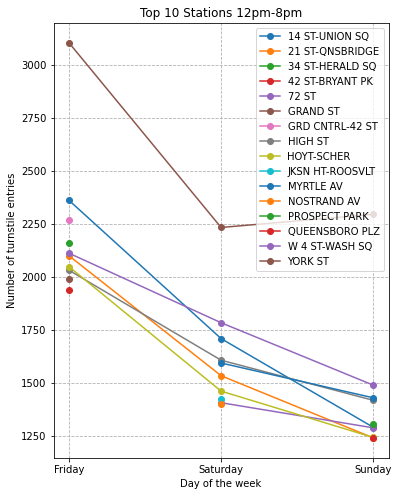

In [53]:
fig = plt.figure(figsize = [6,8])
for i, group in top10_early.groupby('STATION_EARLY'):
    plt.plot(group['WEEKDAY'], group['TOTAL_EARLY'], marker = 'o', label = i)
    
plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(3),['Friday','Saturday','Sunday'])

plt.title('Top 10 Stations 12pm-8pm')
plt.legend()
plt.grid(linestyle = '--')
plt.show()
fig.savefig('top10_early.png', bbox_inches='tight');

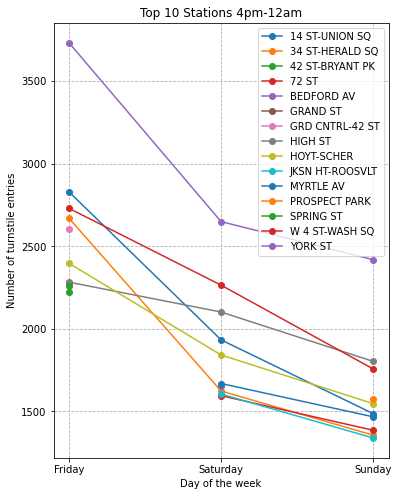

In [54]:
fig = plt.figure(figsize = [6,8])
for i, group in top10_late.groupby('STATION_LATE'):
    plt.plot(group['WEEKDAY'], group['TOTAL_LATE'], marker = 'o', label = i)
    
plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(3),['Friday','Saturday','Sunday'])

plt.title('Top 10 Stations 4pm-12am')
plt.legend()
plt.grid(linestyle = '--')
plt.show()
fig.savefig('top10_late.png', bbox_inches='tight');

In [55]:
import seaborn as sns

In [56]:
# do a different type of join for heatmap
early_heat = wknd_ave.sort_values(['WEEKDAY', 'TOTAL_EARLY'], ascending = [True, False]).groupby('WEEKDAY').head(10).reset_index()

late_heat = wknd_ave.sort_values(['WEEKDAY', 'TOTAL_LATE'], ascending = [True, False]).groupby('WEEKDAY').head(10).reset_index()

early_heat.head()

,index,STATION,WEEKDAY,TOTAL_EARLY,TOTAL_LATE
0,1128,YORK ST,4,3105.288889,3731.900000
1,42,14 ST-UNION SQ,4,2362.331034,2829.711207
2,696,GRD CNTRL-42 ST,4,2270.132670,2601.699281
3,177,34 ST-HERALD SQ,4,2158.910082,2669.887602
4,1086,W 4 ST-WASH SQ,4,2112.909091,2729.652525


In [57]:
# split each df into early and late totals
early_early_heat = early_heat.drop('TOTAL_LATE', axis=1)
early_late_heat = early_heat.drop('TOTAL_EARLY', axis=1)
late_early_heat = late_heat.drop('TOTAL_LATE', axis=1)
late_late_heat = late_heat.drop('TOTAL_EARLY', axis=1)

# rename WEEKDAY to *_EARLY or *_LATE and TOTAL_* to just TOTAL
early_early_heat['WEEKDAY'] = early_early_heat['WEEKDAY'].map({4: 'Friday_Early', 5: 'Saturday_Early', 6: 'Sunday_Early'})
early_late_heat['WEEKDAY'] = early_late_heat['WEEKDAY'].map({4: 'Friday_Late', 5: 'Saturday_Late', 6: 'Sunday_Late'})
late_early_heat['WEEKDAY'] = late_early_heat['WEEKDAY'].map({4: 'Friday_Early', 5: 'Saturday_Early', 6: 'Sunday_Early'})
late_late_heat['WEEKDAY'] = late_late_heat['WEEKDAY'].map({4: 'Friday_Late', 5: 'Saturday_Late', 6: 'Sunday_Late'})

early_early_heat.rename(columns={'TOTAL_EARLY': 'TOTAL'}, inplace=True)
early_late_heat.rename(columns={'TOTAL_LATE': 'TOTAL'}, inplace=True)
late_early_heat.rename(columns={'TOTAL_EARLY': 'TOTAL'}, inplace=True)
late_late_heat.rename(columns={'TOTAL_LATE': 'TOTAL'}, inplace=True)

In [58]:
early_early_heat

,index,STATION,WEEKDAY,TOTAL
0,1128,YORK ST,Friday_Early,3105.288889
1,42,14 ST-UNION SQ,Friday_Early,2362.331034
2,696,GRD CNTRL-42 ST,Friday_Early,2270.132670
3,177,34 ST-HERALD SQ,Friday_Early,2158.910082
4,1086,W 4 ST-WASH SQ,Friday_Early,2112.909091
5,126,21 ST-QNSBRIDGE,Friday_Early,2100.983193
6,732,HOYT-SCHER,Friday_Early,2049.353333
7,720,HIGH ST,Friday_Early,2032.440678
8,687,GRAND ST,Friday_Early,1988.796117
9,201,42 ST-BRYANT PK,Friday_Early,1939.117845


In [59]:
all_heat = pd.concat([early_early_heat, late_early_heat, early_late_heat, late_late_heat])

all_heat.drop_duplicates(inplace=True)

In [60]:
sns.set_theme()

shows = all_heat.pivot("WEEKDAY", "STATION", "TOTAL")
shows

STATION,14 ST-UNION SQ,21 ST-QNSBRIDGE,34 ST-HERALD SQ,42 ST-BRYANT PK,72 ST,BEDFORD AV,GRAND ST,GRD CNTRL-42 ST,HIGH ST,HOYT-SCHER,JKSN HT-ROOSVLT,MYRTLE AV,NOSTRAND AV,PROSPECT PARK,QUEENSBORO PLZ,SPRING ST,W 4 ST-WASH SQ,YORK ST
WEEKDAY,,,,,,,,,,,,,,,,,,
Friday_Early,2362.331034,2100.983193,2158.910082,1939.117845,NaN,NaN,1988.796117,2270.132670,2032.440678,2049.353333,NaN,NaN,NaN,NaN,NaN,1598.559078,2112.909091,3105.288889
Friday_Late,2829.711207,2153.058824,2669.887602,2225.005051,NaN,NaN,2277.868932,2601.699281,2282.813559,2396.820000,NaN,NaN,NaN,NaN,NaN,2260.129683,2729.652525,3731.900000
Saturday_Early,1709.961131,1534.946903,1243.467742,NaN,1407.685185,1159.989761,NaN,NaN,1608.171779,1462.331034,1425.202147,1594.973913,1402.856631,NaN,NaN,NaN,1784.804928,2234.035294
Saturday_Late,1933.389576,1541.318584,1624.047715,NaN,1595.712963,1654.266212,NaN,NaN,2101.865031,1841.958621,1605.432916,1669.260870,1537.659498,NaN,NaN,NaN,2264.466119,2648.941176
Sunday_Early,1291.923561,1241.758621,1022.067909,NaN,1289.262048,NaN,NaN,NaN,1419.079268,1243.896552,1194.066190,1430.887931,NaN,1306.412121,1241.209302,NaN,1490.496746,2295.876543
Sunday_Late,1486.776079,1241.129310,1356.338881,NaN,1386.213855,NaN,NaN,NaN,1803.219512,1547.358621,1339.379249,1467.715517,NaN,1572.903030,1215.779070,NaN,1757.268980,2418.320988


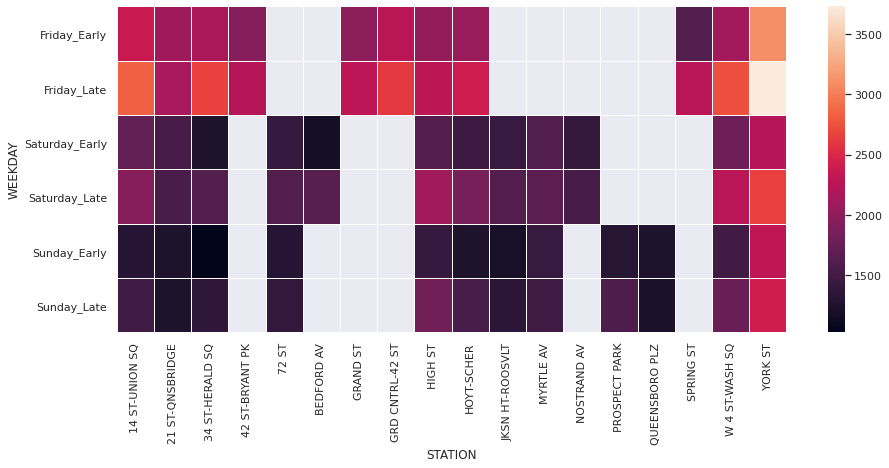

In [61]:
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(shows, annot=False, linewidths=.5, ax=ax)
f.savefig('top10_heatmap.png', bbox_inches='tight');